# Part I - Ford GoBike System

## by Olatunji Gabriel 

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. With features available, i am going to analyse how different type of custermers use the bike sharing systems.


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load Dataset 

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

* There are 183411 observations from the dataset above
* There are 16 features for each observations

### What is/are the main feature(s) of interest in your dataset?
`user_type` is the feature of inerest because so as to know which user rents or uses the bike most in order to increase profit by reaching out to those users who rarely use rents the bike.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The following features are important in supporting my feature of interest:
* `member_birth_year`     
* `member_gender`   
* `user_type`  
* `end_station_latitude`    
* `end_station_longitude`
* `start_station_latitude`
* `start_station_longitude`
* `duration_sec`              
* `start_time`              
* `end_time` 

### Data Cleaning

1) **Change type from object to datetime**

The `start_time` and `end_time` feature should be a datetime type and not object

In [5]:
# convert the start and end time to datetime 
time = ['start_time', 'end_time']
for t in time:
    df[t] = pd.to_datetime(df[t], format='%Y-%m-%d')

**Verify the changes**

In [6]:
df[time].dtypes

start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object

2) **Change object type features to categorical features**<br/>

In [7]:
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

`user_type`, `member_gender` and `bike_share_for_all_trip`

In [8]:
cat = ['user_type', 'member_gender', 'bike_share_for_all_trip']
for c in cat:
    df[c] = df[c].astype('category')

In [9]:
df[cat].dtypes

user_type                  category
member_gender              category
bike_share_for_all_trip    category
dtype: object

3) **Missing values**

In [10]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## Univariate Exploration

In [11]:
def Univariate_viz(df, x_data, title, xlabel, ylabel):
    """
    Univariate plot of a varibale
    """
    palette = sns.color_palette()
    sns.countplot(data=df, x=x_data, color=palette[0])
    plt.title(title, loc='left')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # get the value count of each category
    user_type_count = df[x_data].value_counts()
    
    # get the xticks label and values
    locs, labs = plt.xticks()
    
    for loc, lab in list(zip(locs, labs)):
        user_count = user_type_count[lab.get_text()]  # height values for each user type
        if user_count < 30000:
            plt.text(loc, user_count+100, str(user_count), ha='center', color='black', size='16')
        else:
            plt.text(loc, user_count/2, str(user_count), ha='center', color='White', size='16')
    plt.show()

### Question 1
What types of values are in the user feature?

**Visualization**

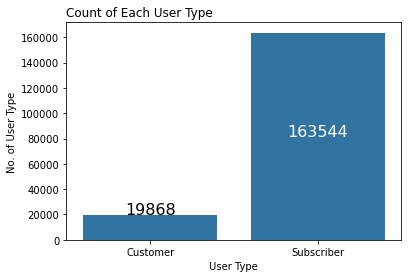

In [12]:
Univariate_viz(df, 'user_type', 'Count of Each User Type', "User Type", 'No. of User Type')

**Observation**

There are up to `19868` customer types and over `163544` subcriber type of user of bike. Most of those who use the bike are subcribers.

### Question 2

what is the number of each gender of those that use the bike?

**Visualization**

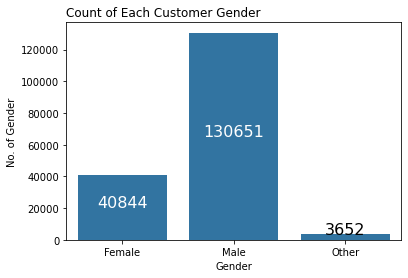

In [13]:
Univariate_viz(df, 'member_gender', 'Count of Each Customer Gender', "Gender", 'No. of Gender')

**Observations**

Male customers mostly use the bike.

### Question 3

How often do bike users share their bike?

**Visualization**

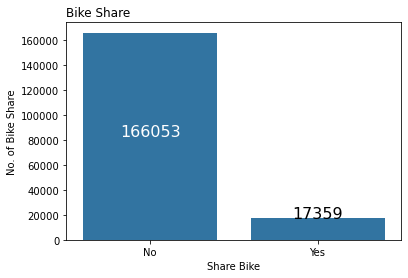

In [14]:
Univariate_viz(df, 'bike_share_for_all_trip', 'Bike Share', "Share Bike", 'No. of Bike Share')

**Observations**

Most of the bike users do not share their bike. Of all the `183411` users, only `17359` users share their bike.

### Question 4

What is the distribution of users birth year?

**Visualization**

In [15]:
df['member_birth_year'].min()

1878.0

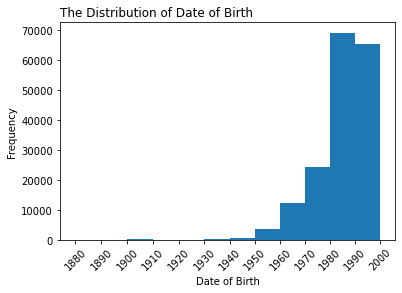

In [16]:
min_year = df['member_birth_year'].min()
max_year = df['member_birth_year'].max()

# bins = np.arange(min_year, max_year+10, 10)
bins = np.arange(1880, 2000+10, 10)

ax = plt.hist(data=df, x='member_birth_year', bins=bins);
# plt.xlim((min_year, max_year))
plt.xscale('log')
plt.title('The Distribution of Date of Birth', loc='left')
plt.xlabel('Date of Birth')
plt.ylabel('Frequency')

plt.xticks(bins, [str(x) for x in bins], rotation=45);

**Observation**

* The data is left skewed (there are ourliers to the left of the distribution). 
* Most of the bike users were born between the year `1988` and `1998`.
* I scaled (log scale) the  data  for me to  be able to see that some observations are skewed to the left

### Question 5

What is the distribution of the duration of bike movement from one location to another?

**Visualization**

Text(0, 0.5, 'Statistical Result')

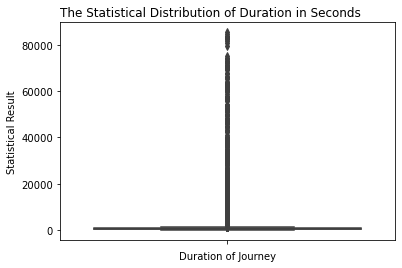

In [17]:
sns.boxplot(data=df, y='duration_sec')
plt.title('The Statistical Distribution of Duration in Seconds', loc='left')
plt.xlabel('Duration of Journey')
plt.ylabel('Statistical Result')

In [18]:
stats = df['duration_sec'].describe().reset_index().rename({'index':'stats'}, axis=1).set_index('stats')
stats

,duration_sec
stats,
count,183412.000000
mean,726.078435
std,1794.389780
min,61.000000
25%,325.000000
50%,514.000000
75%,796.000000
max,85444.000000


As can be seen, 75% of the bike journeyed for less than 796 seconds

There seems to be a lot of outliers in the data.

In [19]:
min_dur = df['duration_sec'].min()
max_dur = df['duration_sec'].max()
print(min_dur, max_dur)
whisker_length = 796 + (1.5*(stats.loc['75%', 'duration_sec']-stats.loc['25%', 'duration_sec']))
whisker_length

61 85444


1502.5

In [20]:
# Since there is an outlier in this feature, i will reduce every value greater than 1.5(IQR)+75quantile..
# to the 1.5(IQR)+75quantile
df['handled_duration'] = df['duration_sec'].apply(lambda x: whisker_length if x > whisker_length else x)

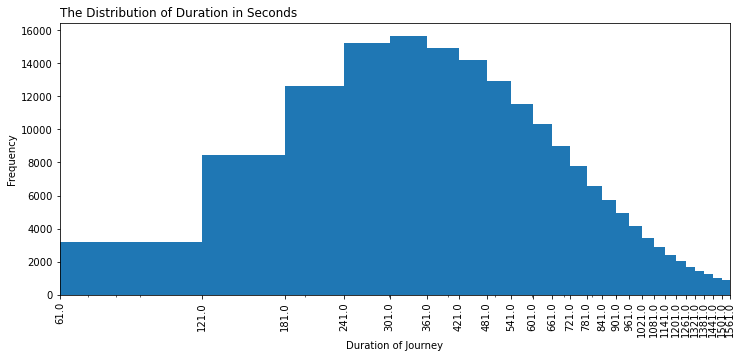

In [21]:
plt.figure(figsize=(12, 5))
bins = np.arange(min_dur, whisker_length+60, 60)

plt.hist(data=df, x='duration_sec', bins=bins);
plt.xscale('log')
plt.xlim((min_dur, whisker_length));
plt.title('The Distribution of Duration in Seconds', loc='left')
plt.xlabel('Duration of Journey')
plt.ylabel('Frequency')

plt.xticks(bins, [str(x) for x in bins], rotation=90);

**Observation**

* There are outliers in the dataset.
* I had to scale (log),  set limit between the minimum duration and duration just below the upper whisker and increase the width of the plot figure.
* This log scaled plot shows the distribution below the upper whisker of the box plot. 
* Most of the bike users journeyed between 301 an 361 seconds.

### Question 6

What are the top 3 most used stations?

**Visualization**

In [22]:
station_name = df['start_station_name'].value_counts().reset_index(
    name='Freq').rename({'index':'Station'}, axis=1)

top_5 = station_name.sort_values('Freq', ascending=False).iloc[:5]

top_5

,Station,Freq
0,Market St at 10th St,3904
1,San Francisco Caltrain Station 2 (Townsend St...,3544
2,Berry St at 4th St,3052
3,Montgomery St BART Station (Market St at 2nd St),2895
4,Powell St BART Station (Market St at 4th St),2760


Text(0.5, 0, 'No. of Usage')

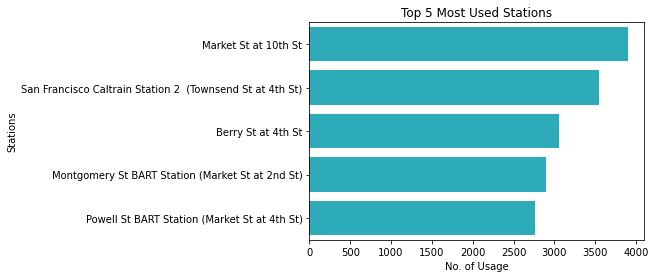

In [23]:
sns.barplot(y=top_5['Station'], x=top_5['Freq'], color=sns.color_palette()[-1])
plt.title("Top 5 Most Used Stations")
plt.ylabel('Stations')
plt.xlabel('No. of Usage')

**Observations**

The three most used stations are:
* Market St at 10th St
* San Francisco Caltrain Station 2 (Townsend St at 4th St)
* Berry St at 4th St
* Montgomery St BART Station (Market St at 2nd St)
* Powell St BART Station (Market St at 4th St)

### Question 7

What are the top 5 least used stations?

**Visualization**

In [24]:
least_5 = station_name.sort_values('Freq').reset_index(drop=True).loc[:5]

least_5

,Station,Freq
0,16th St Depot,2
1,21st Ave at International Blvd,4
2,Palm St at Willow St,4
3,Parker Ave at McAllister St,7
4,Willow St at Vine St,9
5,Taylor St at 9th St,13


In [25]:
least_5.Station.values

array(['16th St Depot', '21st Ave at International Blvd',
       'Palm St at Willow St', 'Parker Ave at McAllister St',
       'Willow St at Vine St', 'Taylor St at 9th St'], dtype=object)

Text(0.5, 0, 'No. of Usage')

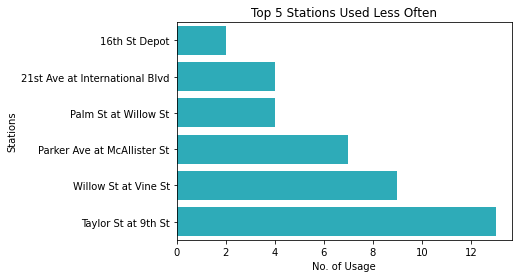

In [26]:
sns.barplot(y=least_5['Station'], x=least_5['Freq'], color=sns.color_palette()[-1])
plt.title("Top 5 Stations Used Less Often")
plt.ylabel('Stations')
plt.xlabel('No. of Usage')

**Observations**

The follow are the list of the top 5 least used stations:
* 16th St Depot
* 21st Ave at International Blvd
* Palm St at Willow St
* Parker Ave at McAllister St
* Willow St at Vine St
* Taylor St at 9th St

### Questions 8

Which time is the most busiest period for starting a bike?

**Visualization**

In [27]:
df['hour'] = df['start_time'].dt.hour

Text(0.5, 0, 'No. of Users')

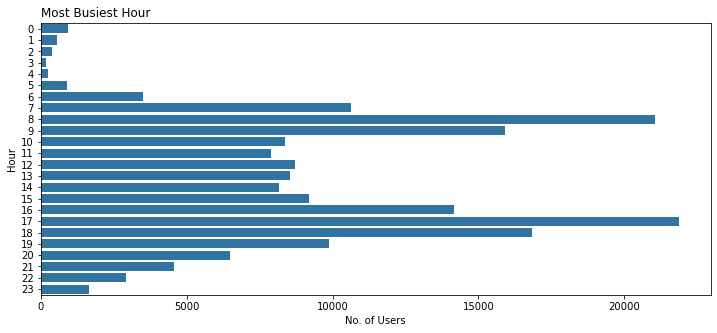

In [28]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, y='hour', color=sns.color_palette()[0])
plt.title('Most Busiest Hour', loc='left')
plt.ylabel("Hour")
plt.xlabel("No. of Users")

**Observations**

* The most busiest period of time is 8 A.M and 5 P.M. Other busy times are 8 A.M, 9 A.M, 6 P.M and 7 P.M 

## Bivariate Exploration

In [29]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [30]:
def bat_plt(df, x, y, title, xlabel, ylabel):
    palette = sns.color_palette()[-1]
    sns.barplot(data=df, x=x, y=y, color=palette)
    plt.title(title, loc='left')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

### Question 9 

What period of time are non subscribers active?

**Visualization**

Text(0, 0.5, 'Active Time (Hr)')

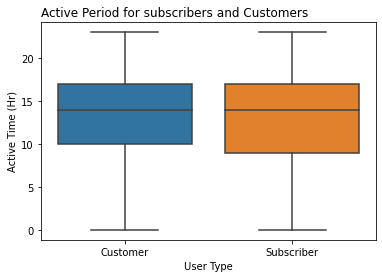

In [31]:
sns.boxplot(data=df, x='user_type', y='hour')
plt.title('Active Period for subscribers and Customers', loc='left')
plt.xlabel('User Type')
plt.ylabel('Active Time (Hr)')

**Observations**

* Most non subscribers tends to be active between 10 A.M and 4 P.M 

### Question 10

What is the relation between the hour of bike start time and duration?

**Visualization**

<AxesSubplot:xlabel='hour', ylabel='handled_duration'>

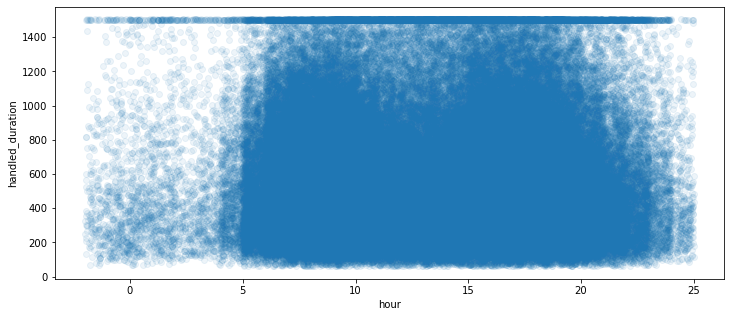

In [32]:
plt.figure(figsize=(12, 5))
sns.regplot(data=df, y='handled_duration', x='hour', x_jitter=2, y_jitter=2, fit_reg=False, scatter_kws={'alpha':0.08}, )

**Observation**

There seems not to be an obvious relationship between the hour of bike start time and duration. 

### Question 11

What is the average duration of each user using the bike?

**Visualization**

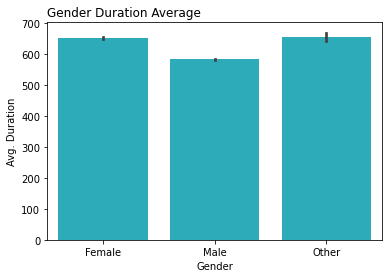

In [33]:
bat_plt(df, 'member_gender', 'handled_duration', 'Gender Duration Average', 'Gender', 'Avg. Duration')

**Observation**

* It is observed that female users used the bike for a longer average period of time than men.

### Question 12

In [34]:
def count_plot(df, x, hue, title, ylabel, xlabel):
    sns.countplot(data=df, hue=hue, x=x)
    plt.title(title, loc='left')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

What gender is more popular to specific type of users?

**Visualization**

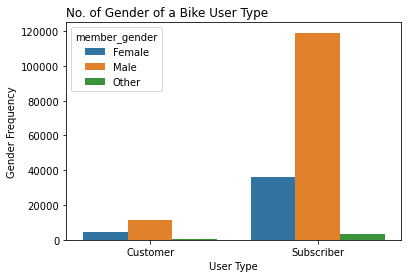

In [35]:
count_plot(df, 'user_type', 'member_gender', 'No. of Gender of a Bike User Type', 'Gender Frequency', 'User Type')

**Observations**

* Thre are way more number male subsciber than female subscribers.
* Thre are all more male customers than female customers but the difference is not much compare to subscrisbers user type.

### Question 13

What gender mostly share bike?

**Visualization**

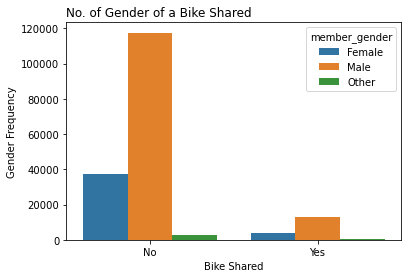

In [36]:
count_plot(df, 'bike_share_for_all_trip', 'member_gender', 'No. of Gender of a Bike Shared', 'Gender Frequency', 'Bike Shared')

**Observations**

* It can be seen that male users shared the bike most.

### Question 14

What is the statistical summary of each gender duration distribution?

**Visualization**

<AxesSubplot:xlabel='member_gender', ylabel='handled_duration'>

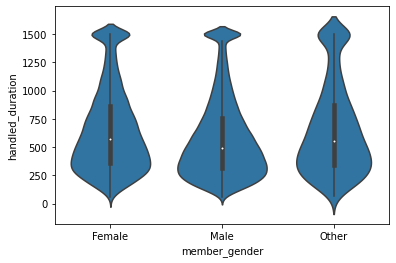

In [37]:
base_color = sns.color_palette()[0]

sns.violinplot(data=df, x='member_gender', y='handled_duration', color=base_color)

**Observations**

* The median value of female and other gender type are more than thaat of male gender type

## Multivariate Exploration

### Question 15

How does duration in seconds relate to gender anduser type?

**Visualization**

Text(0, 0.5, 'Average Duration')

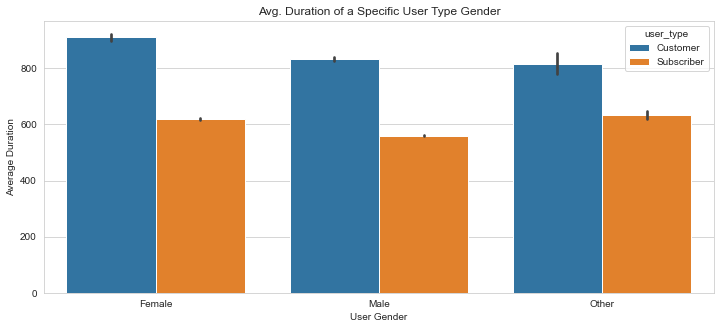

In [38]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='member_gender', y='handled_duration', hue='user_type')
plt.title('Avg. Duration of a Specific User Type Gender')
plt.xlabel('User Gender')
plt.ylabel('Average Duration')

**Observations**

* For all the gender, most cutomers user type spend more time on a trip.
* The average trip for a female customer is way more than any other gemder type.

### Question 16

What is the average value duration for each gender of a specific user type?

**Visualization**

In [39]:
corr = df.groupby(['member_gender', 'user_type'])['handled_duration'].mean().reset_index(name='average')
avg_corr = corr.pivot(index='member_gender', columns='user_type', values='average')
avg_corr

user_type,Customer,Subscriber
member_gender,,
Female,910.718851,620.005912
Male,832.798812,559.175610
Other,817.150549,634.258680


Text(34.0, 0.5, 'Gender')

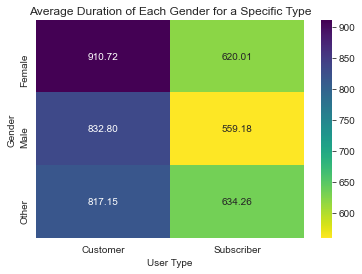

In [40]:
sns.heatmap(avg_corr, annot=True, fmt='.2f', cmap='viridis_r')
plt.title('Average Duration of Each Gender for a Specific Type')
plt.xlabel('User Type')
plt.ylabel('Gender')

**Observations**

* Female customers used large amount of time compare to anyther other gender of any user type.

## Conclusions
From the analysis carried above, here are my finding listed below:<br/>
* There are up to 19868 customer types and over 163544 subcriber type.
* Mostly of the bike users are male.
* Most of the bike users do not share their bike. Of all the 183411 users, only 17359 users share their bike.
* Most of the bike users were born between the year 1988 and 1998.
* Most of the bike users journeyed between 301 an 361 seconds.
* Three most used stations are: Market St at 10th St, San Francisco Caltrain Station 2 (Townsend St at 4th St) and Berry St at 4th St.
* The five (5) least used stations are: 16th St Depot', '21st Ave at International Blvd, Palm St at Willow St, Parker Ave at McAllister St, Willow St at Vine St, Taylor St at 9th St
* The most busiest period of time is 8 A.M and 5 P.M. Other busy times are 8 A.M, 9 A.M, 6 P.M and 7 P.M
* Most non subscribers tends to be active between 10 A.M and 4 P.M.
* It is observed that female users used the bike for a longer average period of time than men.
* For all the gender, most cutomers user type spend more time on a trip.
* The average trip for a female customer is way more than any other gemder type.